In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pdb
from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

In [32]:
def generate_ground_truth(n, theta, random_state=0):
    rng = np.random.default_rng(random_state)
    V = rng.normal(loc=0.0, scale=1.0, size=n)
    Y = V*theta
    return Y, V

def generate_noisy_copy(n, T, sigma, V, random_state=0):
    rng = np.random.default_rng(random_state)
    epsilon = rng.normal(loc=0.0, scale=sigma, size=n)
    V_noisy = V * T + epsilon
    return V_noisy

def generate_V2_given_V1(n, V1, T1, T2, sigma1, sigma2, random_state=0):
    rng = np.random.default_rng(random_state)
    sigma = T2**2 + sigma2**2 - (T1**2 * T2**2)/(T1**2 + sigma1**2)
    mu = T1*T2/(T1**2 + sigma1**2) * V1
    epsilon = rng.normal(loc=0.0, scale=sigma, size=n)
    V2 = mu + epsilon
    return V2

In [33]:
theta=1
n=200
Y, V =generate_ground_truth(n,theta, random_state=0)

In [44]:
T1, T2 = 1,1
sigma1, sigma2 = 1,0.1
V1 = generate_noisy_copy(n, T1, sigma1, V, random_state=1)

In [45]:
rep=10000
r_list = np.zeros(rep)
p1_list = np.zeros(rep)
p2_list = np.zeros(rep)
is_nonneg = np.zeros(rep, dtype=int)
angle_list = np.zeros(rep)


thetaI=theta*T1/(sigma1**2+T1**2)
bar_thetaI=theta*T1/(sigma1**2+T1**2+(T2**2)*(sigma1**2)/(sigma2**2))
bar_thetaJ=theta*T2/(sigma2**2+T2**2+(T1**2)*(sigma2**2)/(sigma1**2))

for i in range(rep):
    seed = i+2
    V2 = generate_V2_given_V1(n, V1, T1, T2, sigma1, sigma2, random_state=seed)
    r = np.inner(V1, V2)/np.inner(V1, V1)
    p1=bar_thetaJ*r-(thetaI-bar_thetaI)
    p2=(np.inner(V1, V2)**2-np.inner(V1, V1)*np.inner(V2, V2))/(np.inner(V1, V1)*np.inner(V2, V2))
    
    r_list[i]=r
    p1_list[i]=p1
    p2_list[i]=p2
    is_nonneg[i] = 1 if bar_thetaJ*r-(thetaI-bar_thetaI) >= 0 else 0
    
    dot_product = np.dot(V1, V2)
    norm_V1 = np.linalg.norm(V1)
    norm_V2 = np.linalg.norm(V2)
    cos_angle = dot_product / (norm_V1 * norm_V2)
    angle_radians = np.arccos(np.clip(cos_angle, -1.0, 1.0))  # Clip to handle numerical errors
    angle_degrees = np.degrees(angle_radians)
    angle_list[i] = angle_degrees
    

In [46]:
rbar = np.mean(r_list)
mu = T1*T2/(sigma1**2+T1**2)
print(f"Ratio empirical mean is {rbar}, expectation is {mu}")

Ratio empirical mean is 0.500221674796699, expectation is 0.5


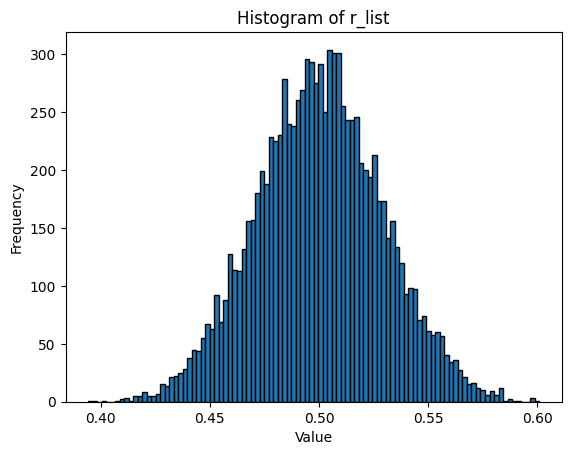

In [47]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(r_list, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of r_list')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

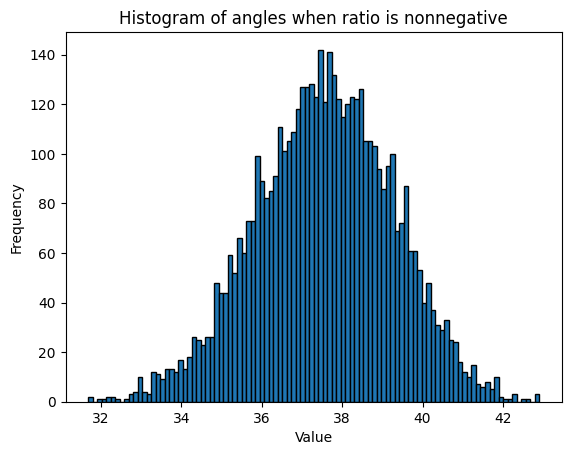

In [48]:
# Plotting the histogram
plt.hist(angle_list[np.where(is_nonneg==1)], bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of angles when ratio is nonnegative')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

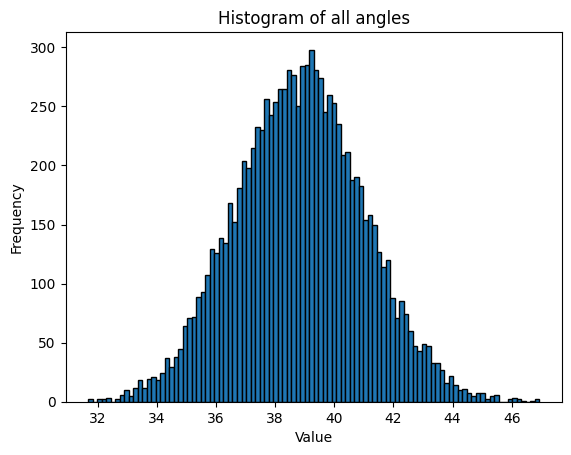

In [49]:
# Plotting the histogram
plt.hist(angle_list, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of all angles')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [50]:
np.mean(angle_list[np.where(is_nonneg==1)])

37.55110739531123

In [52]:
np.mean(angle_list)

38.837645998159644

In [53]:
th = T1*T2/(np.sqrt(T1**2+sigma1**2)*np.sqrt(T2**2+sigma2**2))
np.degrees(np.arccos(th))

45.283647107268074

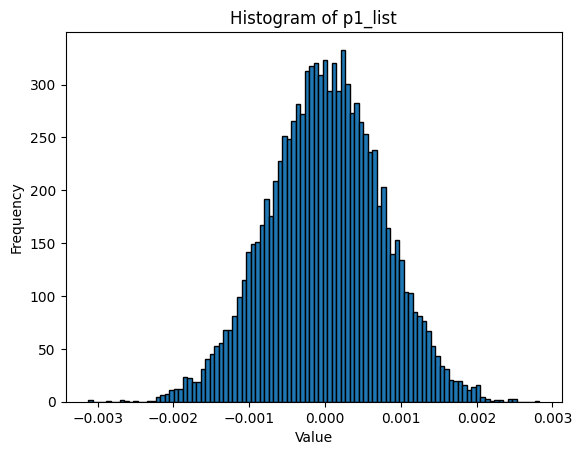

In [14]:
# Plotting the histogram
plt.hist(p1_list, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of p1_list')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

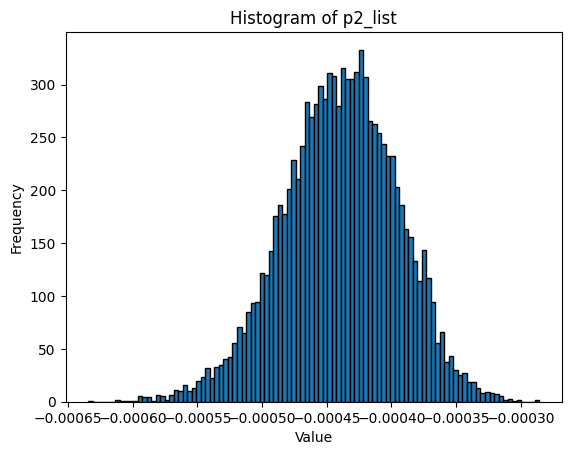

In [15]:
# Plotting the histogram
plt.hist(p2_list, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of p2_list')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

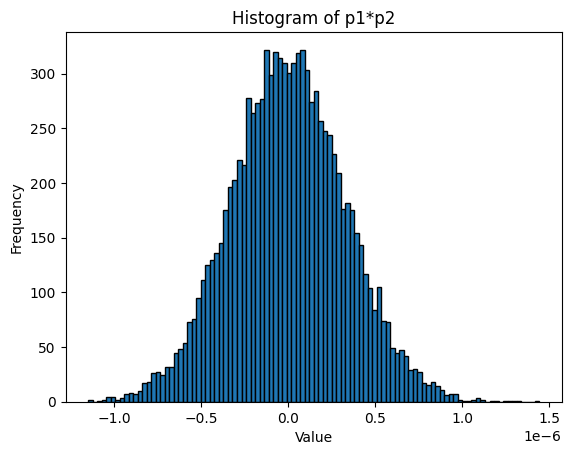

In [16]:
# Plotting the histogram
plt.hist(p2_list*p1_list, bins=100, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of p1*p2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [17]:
n**(-1/2)

0.07071067811865475

In [18]:
n**(-1)

0.005

In [19]:
eps = np.random.normal(loc=0,scale=n**(-1),size=rep)

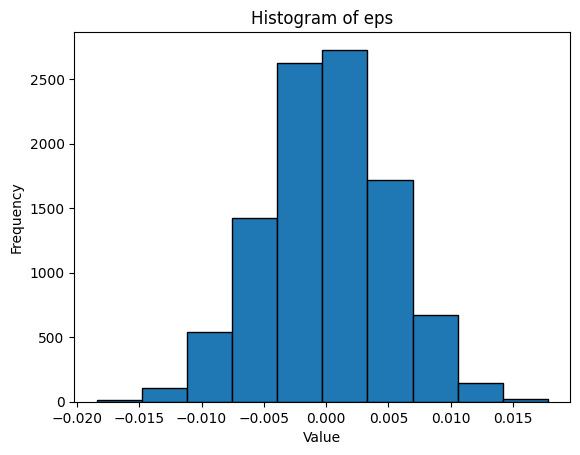

In [20]:
# Plotting the histogram
plt.hist(eps, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of eps')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()